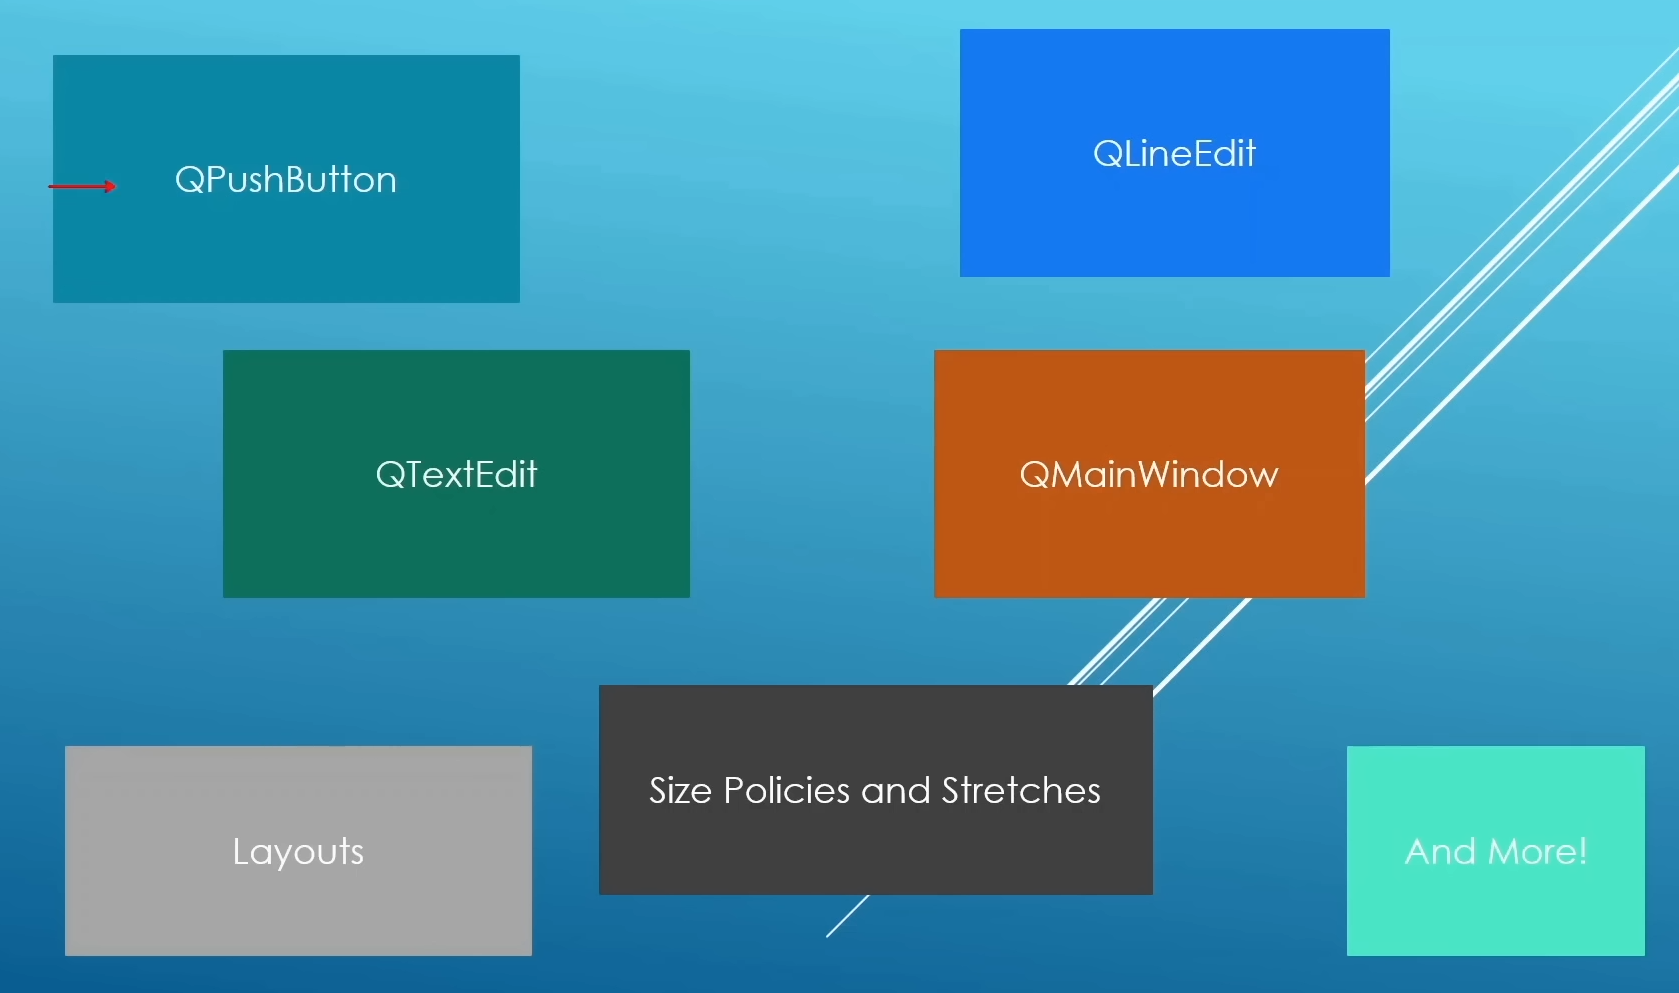



In [11]:
from PySide6.QtCore import Qt
from PySide6.QtWidgets import QApplication, QMainWindow, QPushButton, QSlider
import sys


### QT Inherit - Classes

In [2]:
class ButtonHolder(QMainWindow): # inherit from QMainWindow
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Window title!")
        button = QPushButton("button text")

        self.setCentralWidget(button)

### Simple display button

In [5]:

# this only happens on jupyter!
app = None 
if not QApplication.instance():
    app = QApplication(sys.argv)
else:
    app = QApplication.instance()

window = ButtonHolder()
window.show()
app.exec()

0

### Signals and Slots

In [9]:
def button_clicked():
    print("Button clicked!")

# this only happens on jupyter!
app = None 
if not QApplication.instance():
    app = QApplication(sys.argv)
else:
    app = QApplication.instance()

button = QPushButton("Button")
button.clicked.connect(button_clicked)

button.show()
app.exec()


Button clicked!
Button clicked!
Button clicked!
Button clicked!


0

In [10]:
def button_clicked(data):
    print(f'here is your data: {data}')

 
# this only happens on jupyter!
app = None 
if not QApplication.instance():
    app = QApplication(sys.argv)
else:
    app = QApplication.instance()

button = QPushButton("Button")
button.setCheckable(True)   # makes the button checkable, its unchecked by default.
                            # clicks toggle state

button.clicked.connect(button_clicked)

button.show()
app.exec()

here is your data: True
here is your data: False
here is your data: True
here is your data: False
here is your data: True
here is your data: False
here is your data: True


0

In [14]:
def respond_to_slider(data):
    print(f'here is your data: {data}')

app = None 
if not QApplication.instance():
    app = QApplication(sys.argv)
else:
    app = QApplication.instance()

slider = QSlider(Qt.Vertical) # can also be "Horizontal"
slider.setMinimum(1)
slider.setMaximum(100)
slider.setValue(50)

slider.valueChanged.connect(respond_to_slider)
slider.show()
app.exec()

here is your data: 52


0